In [1]:
import cv2

ImportError: DLL load failed: The specified module could not be found.

In [2]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import sys

In [3]:
img = cv2.imread("1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # getting the image and converting to gray

In [4]:
# thresholding 
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [5]:
#denoising
gray = cv2.medianBlur(gray, 3)

In [6]:
os.getpid()

5196

In [7]:
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

True

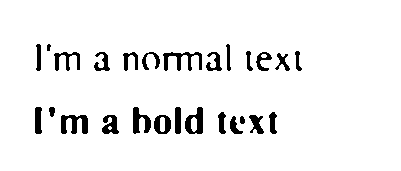

In [8]:
Image.open(filename)

In [9]:
import pytesseract                     # getting the pytesseract to program
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract'

In [10]:
text = pytesseract.image_to_string(Image.open(filename))
# os.remove(filename)
print(text)

I'm a normal 18x1

I'm a bold text


In [11]:
#import nltk


In [12]:
#nltk.download()

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [14]:
from nltk.corpus import stopwords

In [15]:
stops = set(stopwords.words('english'))

In [16]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
words=word_tokenize(text)

In [18]:
clean_wrods = [w for w in  words if not w in stops]

In [19]:
clean_wrods

['I', "'m", 'normal', '18x1', 'I', "'m", 'bold', 'text']

In [20]:
import numpy as np

In [21]:
#newWords=np.asarray(clean_wrods)               # 

In [22]:
import pandas as pd

In [23]:
df=pd.DataFrame(clean_wrods)                #getting clean text i.e removing the stopwords

In [24]:
df                                         # pandas dataframe to identify unique words

,0
0,I
1,'m
2,normal
3,18x1
4,I
5,'m
6,bold
7,text


In [25]:
df[0].unique()

array(['I', "'m", 'normal', '18x1', 'bold', 'text'], dtype=object)

In [26]:
uniqueWords=df[0].unique()

In [119]:
#unique words generating dictionary
def makeDictionary(array,cleanWords):
    dict1={} 
    for word in array:
        count=0
        for i in range(len(cleanWords)):
            if word==cleanWords[i]:
                count=count+1
        dict1[word]=count
    return dict1

### Making Dictionary for second document

In [28]:
img=cv2.imread("5.jpg")              #doing above things for the second picture

In [29]:
# thresholding 
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [30]:
#denoising
gray = cv2.medianBlur(gray, 3)

In [31]:
os.getpid()

5196

In [32]:
filename = "{}.jpg".format(os.getpid())
cv2.imwrite(filename, gray)

True

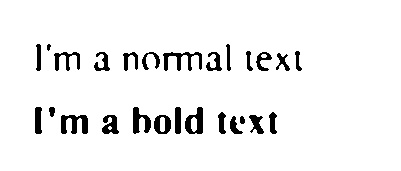

In [33]:
Image.open(filename)

In [34]:
text2 = pytesseract.image_to_string(Image.open(filename))
# os.remove(filename)
print(text2)

I'm a normal text

I'm a bold text


In [35]:
wordsOfText2=word_tokenize(text2)

In [36]:
wordsOfText2

['I', "'m", 'a', 'normal', 'text', 'I', "'m", 'a', 'bold', 'text']

In [37]:
clean_text2=[w for w in wordsOfText2 if not  w  in stops]

In [38]:
clean_text2

['I', "'m", 'normal', 'text', 'I', "'m", 'bold', 'text']

In [39]:
def makedataFrame(array):
    return pd.DataFrame(array)   

In [40]:
text2dataFrame=makedataFrame(clean_text2)

In [41]:
text2

"I'm a normal text\n\nI'm a bold text"

In [42]:
text2dataFrame

,0
0,I
1,'m
2,normal
3,text
4,I
5,'m
6,bold
7,text


In [43]:
dict2=makeDictionary(text2dataFrame[0].unique(),clean_text2)

['I', "'m", 'normal', 'text', 'I', "'m", 'bold', 'text']
['I' "'m" 'normal' 'text' 'bold']


In [44]:
dict1=makeDictionary(df[0].unique(),clean_wrods)

['I', "'m", 'normal', '18x1', 'I', "'m", 'bold', 'text']
['I' "'m" 'normal' '18x1' 'bold' 'text']


In [45]:
len(dict1)

6

In [46]:
text2dataFrame

,0
0,I
1,'m
2,normal
3,text
4,I
5,'m
6,bold
7,text


In [47]:
text2dataFrame[0].unique()

array(['I', "'m", 'normal', 'text', 'bold'], dtype=object)

In [48]:
clean_text2

['I', "'m", 'normal', 'text', 'I', "'m", 'bold', 'text']

## 

In [49]:
dict2=makeDictionary(text2dataFrame[0].unique(),clean_text2)   # gerring the dictionary of words for second file

['I', "'m", 'normal', 'text', 'I', "'m", 'bold', 'text']
['I' "'m" 'normal' 'text' 'bold']


In [50]:
dict2

{'I': 2, "'m": 2, 'normal': 1, 'text': 2, 'bold': 1}

In [51]:
index2=dict2.keys()

In [52]:
#getting the words from the dictionary 
def getIndex(dictionary):                                    
    a=[]
    for k,v in dictionary.items():
        a.append(k)
    return a

In [53]:
#comparing two dictionaries to get overall result 
def generateResult(dictonaryOfFirstFile,dictionaryOfAllPreviosPdf):   
    index1=getIndex(dictonaryOfFirstFile)
    index2=getIndex(dictionaryOfAllPreviosPdf)
    valSum=0
    for indexValue in index1:
        if indexValue in index2 :
            valSum=valSum+(max(dictonaryOfFirstFile[indexValue],dictionaryOfAllPreviosPdf[indexValue])-min(dictonaryOfFirstFile[indexValue],dictionaryOfAllPreviosPdf[indexValue]))/max(dictonaryOfFirstFile[indexValue],dictionaryOfAllPreviosPdf[indexValue])
        return valSum/max(len(dictonaryOfFirstFile),len(dictionaryOfAllPreviosPdf))*100

In [54]:
ans=generateResult(dict2,dict1)

In [55]:
ans

0.0

In [56]:
ans=generateResult(dict2,dict2)

In [57]:
dict2.keys()

dict_keys(['I', "'m", 'normal', 'text', 'bold'])

In [58]:
ans

0.0

In [59]:
dir()

['Image',
 'In',
 'Out',
 '_',
 '_16',
 '_19',
 '_24',
 '_25',
 '_31',
 '_32',
 '_33',
 '_36',
 '_38',
 '_41',
 '_42',
 '_45',
 '_46',
 '_47',
 '_48',
 '_50',
 '_55',
 '_57',
 '_58',
 '_6',
 '_7',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'ans',
 'argparse',
 'clean_text2',
 'clean_wrods',
 'cv2',
 'df',
 'dict1',
 'dict2',
 'exit',
 'filename',

In [60]:
dict1={}

In [61]:
dict1['I']=2

In [62]:
dict1['am']=4
dict1['learning']=2
dict1['Machine']=1
dict1['for']=1
dict1['NSDA']=1

In [63]:
dict1

{'I': 2, 'am': 4, 'learning': 2, 'Machine': 1, 'for': 1, 'NSDA': 1}

In [64]:
dict2={'I':4,'am':24,'Machine':3,'Deep':2}

In [65]:
dict2

{'I': 4, 'am': 24, 'Machine': 3, 'Deep': 2}

In [66]:
ans=generateResult(dict1,dict2)

In [67]:
ans

8.333333333333332

In [68]:
from wordcloud import WordCloud

In [69]:
words=' '.join(text2dataFrame[0])

In [70]:
# generating wordcloud 
wordcloud=WordCloud(background_color='white',height=2500,width=3000).generate(words)

In [71]:
from matplotlib import pyplot as plt

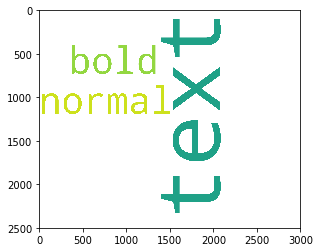

In [72]:
plt.imshow(wordcloud)

### Trying outr pdf conversion 

In [73]:
#from tabula import read_pdf

ModuleNotFoundError: No module named 'tabula'

In [74]:
dfforText=read_pdf('Food-Processing.pdf')

NameError: name 'read_pdf' is not defined

In [123]:
 # importing required modules
import PyPDF2
def getTextFromPdf(filenameOfPdf):
      # creating a pdf file object
    pdfFileObj = open(str(filenameOfPdf), 'rb')

      # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

      # printing number of pages in pdf file
    print(pdfReader.numPages)

      # creating a page object
    pageObj = pdfReader.getPage(5)

      # extracting text from page
    text=pageObj.extractText()

      # closing the pdf file object
    pdfFileObj.close()
    return text


In [76]:
import pandas as pd

In [125]:
text=getTextFromPdf("Food-Processing.pdf")

73


In [126]:
len(text)

2664

In [80]:
#df=pd.read_csv(text)

In [81]:
type(text)

str

In [83]:
import PyPDF2 
#import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [84]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd


In [85]:
testData=StringIO(text)

In [86]:
df=pd.read_csv(testData,sep="\n")

In [135]:
#df

In [88]:
cleanWords=df["Food"].unique()

In [134]:
#cleanWords

In [121]:
dictionary=makeDictionary(cleanWords,df["Food"])

In [133]:
#dictionary

In [131]:
#df["Food"]

In [98]:
words=" ".join(df["Food"])

In [99]:
wordcloud=WordCloud(background_color='white',height=2500,width=3000).generate(words)

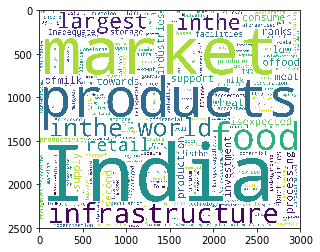

In [100]:
plt.imshow(wordcloud)

### Doing for the second pdf 

In [101]:
import PyPDF2

In [127]:
text2=getTextFromPdf("BuildingRealEstate.pdf")

64


In [130]:
#text2

In [104]:
testdata2=StringIO(text2)

In [105]:
dfData=pd.read_csv(testdata2,sep="\n")

In [107]:
words2=" ".join(dfData["Demand for affordabl"])

In [108]:
from wordcloud import WordCloud

In [109]:
wordcloud2=WordCloud(background_color='white',height=2500,width=3000).generate(words2)

In [110]:
from matplotlib import pyplot as plt

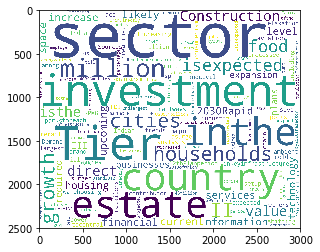

In [111]:
plt.imshow(wordcloud2)

In [115]:
cleanWords2=dfData["Demand for affordabl"].unique()

In [120]:
dictionary2=makeDictionary(cleanWords2,dfData["Demand for affordabl"])

In [117]:
dictionary2

{'e housing is more likely to increase from current level of 29 million households to more than 38': 1,
 'million households ': 1,
 'by ': 1,
 '2030Rapid growth in the I': 1,
 'nformation technology and financial services space and upcoming expansion plans of': 1,
 'businesses into Tier': 1,
 '-II and Tier': 1,
 '-III cities': 1,
 'Investments': 1,
 'required': 1,
 'inkeyinfrastructure': 1,
 'including': 1,
 'power,': 1,
 'road,': 1,
 'railways,': 1,
 'ports': 1,
 'andcivil': 1,
 'aviation': 1,
 'isexpected': 2,
 'toreach': 1,
 '$1trillion': 1,
 'during': 2,
 'the': 5,
 '12thPlanperiod': 1,
 'Demand for warehousing sp': 1,
 'ace (ambient and cold chain) in the country in major Tier': 1,
 '-I and Tier': 1,
 '-II cities is expected t': 1,
 'osurge as industr': 1,
 'ial parks are being setup and food trends shifting to more processed ': 1,
 'food': 1,
 'Increasing consumerism and r': 1,
 'elaxation of FDI in multi': 1,
 '-brand retail has surged aggres': 1,
 'sive growth among Indian': 1,

In [118]:
generateResult(dictionary,dictionary2)

0.0

In [4]:
def getTextFromPDFALLPages(nameOfPdfFile):
    import PyPDF2
    pdfFileObj = open(str(nameOfPdfFile), 'rb')

      # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

      # printing number of pages in pdf file
    pages=pdfReader.numPages

    wholetext=""
    # creating a page object
    for i in range (pages):
        pageObj = pdfReader.getPage(i)

      # extracting text from page
        text=pageObj.extractText()
        wholetext=wholetext+text
      # closing the pdf file object
    pdfFileObj.close()
    return wholetext

In [145]:
allText=getTextFromPDFALLPages("Contact-Details-SSC.pdf")

0
1
2


In [146]:
alltext

NameError: name 'alltext' is not defined

In [147]:
allText

'CONTACT DETAILS OF SECTOR SKILL COUNCILS\nName\nEmail\nAddress\n1\nAutomotive\nAutomotive Skills Development \nCouncil\nMr Sunil Chaturvedi\nskc@asdc.org.in\nAutomotive Skills Development Council\nSat Paul Mittal Building, \n1/6, Siri Institutional Area,  \nAugust Kranti Marg (Khel Gaon Marg)\n\n2\nSecurity \nSecurity Sector Skill \nDevelopment Council\nMaj Gen AK Sakhuja (Retd)\nceo@sssdc.in\nSecurity Sector Skill Development Council\n305, City Court\nSikanderpur, MG Road\n\n3\nRetail\n\nCouncil of India\nMr James A Raphael \njames.raphael@rasci.in \nRetailers Association\'s Skill Council of India, \n703-704 Sagar Tech Plaza - A, Andheri-Kurla Road, \nSakinaka Junction, Sakinaka, Andheri (E), Mumbai-400 072.\n4\nIT-ITeS\nIT-ITeS  Sector Skill Council\nDr Sandhya Chintala \nsandhya@nasscom.in\n4E-Vandana Building (4th Floor)\n11, Tolstoy Marg\nNew Delhi-110001\n5\nMedia\nMedia & Entertainment Skills \nCouncil\nMs. Sonal Mathur                               \nMr. Mohit Soni\n(Contact P

In [2]:
def makeDataFrameFromText(textData):
    try:
        import StringIO 
    except ImportError:
        from io import StringIO
        
    testData=StringIO(textData)
    import pandas as pd
    dataFrameForPdf=pd.read_csv(testData,sep="\n")  # making the text to a dataFrame Column
    columnName=list(dataFrameForPdf.columns.values)
    return dataFrameForPdf,columnName

In [28]:
allText=getTextFromPDFALLPages("QF - LMV Owner Driver.pdf")

In [29]:
allText

"QUALIFICATION FILE TEMPLATE\n \n \n \nPage \n1\n \nof \n18\n \n \n \n \n \n \n \n \n \nCONTACT DETAILS OF THE AWARDING BODY FOR THE QUALIFICATION\n \n \n \n \n \n \n \n \n \n \n1.\n \nName and address of awarding body:\n \n \nNational Academy of RUDSETI\n \nChitrapur Bhavan\n \n15\nth\n \nCross, 8\nth\n \nMain\n \nMalleswaram\n \nBengaluru\n-\n \n560 055\n \nPh: 080\n-\n \n2346 2875\n \nEmail:\n \ninfo@rudsetacademy.org\n \n \n \n2.\n \nName and contact details of the Individual dealing with the submission:\n \n \nName:\n \nSri. R. R. Singh\n \nPosition in \nthe Organization\n: \nDirector General\n \nAddress:\n \nSame as above\n \nEmail\n: \ndg@rudsetacademy.org\n \n \n \n3.\n \nList of Documents submitted in support of the Qualifications file\n \n(Annexure)\n \n \n1.\n \nAbout National Academy of RUDSET\n \n2.\n \nRUDSETI Model \nof Entrepreneurship Development\n \n3.\n \nCurriculum document /Syllabus\n \n4.\n \nSession Plan\n \n5.\n \nBank wise list of RSETIs\n \n6.\n \nResearch Stu

In [158]:
df,columnName=makeDataFrameFromText(allText)

In [159]:
columnName[0]

'CONTACT DETAILS OF SECTOR SKILL COUNCILS'

In [13]:
def makeDictionaryFromText(textData):
    dataFrameForPdf,columnName=makeDataFrameFromText(textData)
    uniqueWords=dataFrameForPdf[columnName[0]].unique()
    temp={}
    temp=makeDictionary(uniqueWords,dataFrameForPdf[columnName[0]])
    return temp

In [10]:
temp,columnName=makeDataFrameFromText(allText)

In [12]:
temp[columnName[0]]

0                                       QUALIFICATION FIL
1                                              E GUIDANCE
2                                             Version 6: 
3                                                       D
4                                                 raft of
5                                                      08
6                                              March 2016
7                                                       1
8                                     CONTACT DETAILS OF 
9                                                     THE
10                                                   BODY
11                                        SUBMITTING THE 
12                                          QUALIFICATION
13                                                   FILE
14                                   Name and address of 
15                                             submitting
16                                                  body:
17            

In [260]:
ans

100.0

In [21]:
# unique words generating dictionary
def makeDictionary(array,cleanWords):
    dict1={} 
    for word in array:
        count=0
        for i in range(len(cleanWords)):
            if word==cleanWords[i]:
                count=count+1
        dict1[word]=count
    return dict1

In [20]:
def generateResult(dictonaryOfFirstFile,dictionaryOfAllPreviosPdf):   
    index1=getIndex(dictonaryOfFirstFile)
    index2=getIndex(dictionaryOfAllPreviosPdf)
    valSum=0
    for indexValue in index1:
        if indexValue in index2 :
            if dictonaryOfFirstFile[indexValue]==dictionaryOfAllPreviosPdf[indexValue]:
                valSum=valSum+1
            else:
                valSum=valSum+(min(dictonaryOfFirstFile[indexValue],dictionaryOfAllPreviosPdf[indexValue]))/max(dictonaryOfFirstFile[indexValue],dictionaryOfAllPreviosPdf[indexValue])        
    return (valSum/max(len(dictonaryOfFirstFile),len(dictionaryOfAllPreviosPdf)))*100

In [19]:
#getting the words from the dictionary 
def getIndex(dictionary):                                    
    a=[]
    for k,v in dictionary.items():
        a.append(k)
    return a

In [18]:
def mainProgram():
    file1=input("enter name of first file")
    file2=input("enter name of second file")
    text1=getTextFromPDFALLPages(file1)
    text2=getTextFromPDFALLPages(file2)
    dictionary1=makeDictionaryFromText(text1)
    dictionary2=makeDictionaryFromText(text2)
    ans=generateResult(dictionary1,dictionary2)
    print(ans)
#     getWordCloud(text1)
#     getWordCloud(text2)

In [17]:
mainProgram()

NameError: name 'mainProgram' is not defined

In [268]:
mainProgram()

enter name of first fileContact-Details-SSC.pdf
enter name of second fileFood-Processing.pdf
0.10619977037887485


In [269]:
mainProgram()

enter name of first fileContact-Details-SSC.pdf
enter name of second fileContact-Details-SSC.pdf
100.0


In [271]:
data=makeDictionaryFromText(allText)

In [272]:
data

{'Name': 1,
 'Email': 1,
 'Address': 1,
 '1': 1,
 'Automotive': 1,
 'Automotive Skills Development ': 1,
 'Council': 10,
 'Mr Sunil Chaturvedi': 1,
 'skc@asdc.org.in': 1,
 'Automotive Skills Development Council': 1,
 'Sat Paul Mittal Building, ': 1,
 '1/6, Siri Institutional Area,  ': 1,
 'August Kranti Marg (Khel Gaon Marg)': 1,
 '2': 1,
 'Security ': 1,
 'Security Sector Skill ': 1,
 'Development Council': 2,
 'Maj Gen AK Sakhuja (Retd)': 1,
 'ceo@sssdc.in': 1,
 'Security Sector Skill Development Council': 1,
 '305, City Court': 1,
 'Sikanderpur, MG Road': 1,
 '3': 1,
 'Retail': 1,
 'Council of India': 3,
 'Mr James A Raphael ': 1,
 'james.raphael@rasci.in ': 1,
 "Retailers Association's Skill Council of India, ": 1,
 '703-704 Sagar Tech Plaza - A, Andheri-Kurla Road, ': 1,
 'Sakinaka Junction, Sakinaka, Andheri (E), Mumbai-400 072.': 1,
 '4': 1,
 'IT-ITeS': 1,
 'IT-ITeS  Sector Skill Council': 1,
 'Dr Sandhya Chintala ': 1,
 'sandhya@nasscom.in': 1,
 '4E-Vandana Building (4th Floor)

In [273]:
len(allText)

9000

In [320]:
def getWordCloud(text):
    from matplotlib import pyplot as plt
    df,columnName=makeDataFrameFromText(text)
    words=" ".join(df[columnName[0]])
    wordcloudTemp=getWordCloudHelper(words)
    plt.imshow(wordcloudTemp)

In [282]:
def getWordCloudHelper(text,):
    from wordcloud import WordCloud
    return WordCloud(background_color='white',height=4000,width=5000).generate(text)

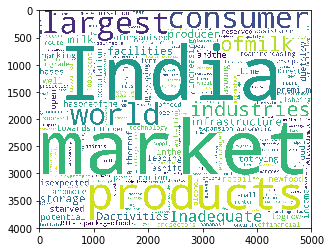

In [326]:
getWordCloud(allText)

In [361]:
def getCleanText(text):
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    stops = set(stopwords.words('english'))
    words=word_tokenize(text)
    
    clean_words = [w for w in  words if not w in stops]
    return clean_words

In [30]:
mainProgram()

enter name of first fileQF - LMV Owner Driver.pdf
enter name of second fileNSQF-Light Motor Vehicle Driver.pdf


EmptyDataError: No columns to parse from file

In [328]:
mainProgram()

enter name of first fileNSQF-Light Motor Vehicle Driver.pdf
enter name of second fileNSQF-Taxi Driver.pdf
100.0


In [329]:
mainProgram()

enter name of first fileNSQF-Taxi Driver.pdf
enter name of second fileQF - LMV Owner Driver.pdf
100.0


In [22]:
mainProgram()

enter name of first fileQF _Accounting_BAN101.pdf
enter name of second fileNSQF- Advance Pattern Maker (CAD-CAM).pdf


EmptyDataError: No columns to parse from file

In [380]:
text1=getTextFromPDFALLPages("NSQF-Light Motor Vehicle Driver.pdf")

In [381]:
text2=getTextFromPDFALLPages("NSQF-Taxi Driver.pdf")

In [382]:
dict1=makeDictionaryFromText(text1)

IndexError: list index out of range

In [377]:
dict2=makeDictionaryFromText(text2)

IndexError: list index out of range

In [383]:
text2

[]

In [358]:
ans

100.0

In [387]:
text2=getTextFromPDFALLPages("NSQF-Light Motor Vehicle Driver.pdf")

In [388]:
text2

[]